# Polars Descriptive Statistics Assignment
## Aircraft wildlife strikes data | 1990 - 2015

In this exercise, we will extract and analyze aircraft wildlife strikes data, and we will determine the probability of each part of an aircraft getting damaged by an aircraft wildlife strike

In [1]:
# Import the necessary libraries

import polars as pl
import matplotlib.pyplot as plt
import requests
import io

In [2]:
# Read our data from Google Drive

file_id = "1TAD7Uyc9PjByt_q13uvGXGeubXnujnUi"
url = f"https://drive.google.com/uc?id={file_id}"

# Download the contents of the CSV file
download = requests.get(url).content

# Read the CSV file into a polars DataFrame
df = pl.read_csv(
    io.StringIO(download.decode("utf-8")), low_memory=False, infer_schema_length=10000
)

In [3]:
# Explore the data

df.head()

Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
i64,i64,i64,i64,str,str,str,str,str,str,i64,i64,str,i64,str,str,i64,str,i64,str,str,str,str,str,str,str,str,i64,i64,f64,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
127128,1990,1,1,"""DAL""","""DELTA AIR LINE…","""B-757-200""","""A""","""148""","""26""",4,34,"""40""",2,"""D""","""1""",1,null,null,"""KCVG""","""CINCINNATI/NOR…","""KY""","""ASO""",null,"""CLIMB""",null,null,null,null,null,"""NE1""","""GULL""","""1""",null,null,null,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0
129779,1990,1,1,"""HAL""","""HAWAIIAN AIR""","""DC-9""","""A""","""583""","""90""",4,34,"""10""",2,"""D""","""5""",5,null,null,"""PHLI""","""LIHUE ARPT""","""HI""","""AWP""",null,"""TAKEOFF RUN""",null,null,0,null,0.0,"""ZZ201""","""HOUSE SPARROW""","""1""",null,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
129780,1990,1,2,"""UNK""","""UNKNOWN""","""UNKNOWN""",null,null,null,null,null,null,null,null,null,null,null,null,"""PHLI""","""LIHUE ARPT""","""HI""","""AWP""",null,null,null,null,null,null,0.0,"""R1101""","""BARN OWL""","""1""",null,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2258,1990,1,3,"""MIL""","""MILITARY""","""A-10A""","""A""","""345""",null,3,22,null,2,"""D""",null,null,null,null,"""KMYR""","""MYRTLE BEACH I…","""SC""","""ASO""",null,"""APPROACH""","""DAY""",null,200,138,null,"""UNKBM""","""UNKNOWN MEDIUM…","""1""",null,null,null,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2257,1990,1,3,"""MIL""","""MILITARY""","""F-16""","""A""","""561""",null,null,null,null,null,null,null,null,null,null,"""KJAX""","""JACKSONVILLE I…","""FL""","""ASO""",null,"""CLIMB""","""DAY""",null,100,200,null,"""ZX""","""FINCH""","""1""",null,null,null,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [4]:
df.describe()

describe,Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
str,f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,str,f64,str,str,f64,str,f64,str,str,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",174104.0,174104.0,174104.0,174104.0,"""174104""","""174104""","""174104""","""174104""","""174104""","""174104""",174104.0,174104.0,"""174104""",174104.0,"""174104""","""174104""",174104.0,"""174104""",174104.0,"""174104""","""174104""","""174104""","""174104""","""174104""","""174104""","""174104""","""174104""",174104.0,174104.0,174104.0,"""174104""","""174104""","""174104""","""174104""",174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0,174104.0
"""null_count""",0.0,0.0,0.0,0.0,"""0""","""0""","""0""","""41030""","""43053""","""51665""",46784.0,50670.0,"""52116""",46762.0,"""46822""","""47911""",55389.0,"""162445""",171012.0,"""0""","""290""","""21976""","""18902""","""97686""","""55302""","""64171""","""85782""",70427.0,102846.0,74391.0,"""0""","""80""","""4477""","""74639""",173539.0,173875.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",241204.036915,2006.036392,7.17184,15.712264,null,null,null,null,null,null,3.510611,21.306958,null,2.057656,null,null,2.91857,null,2.058538,null,null,null,null,null,null,null,null,831.032283,141.925622,0.703738,null,null,null,null,0.046018,1.746725,0.085977,0.107757,0.00915,0.138934,0.005956,0.122369,0.006577,0.055605,0.014445,0.045168,0.011619,0.003182,0.000971,0.001918,0.000425,0.05518,0.020086,0.003326,0.119159,0.024009,0.102703,0.004733,0.046242,0.005813,0.011235,0.004176,0.005962,0.004216,0.090727,0.008989
"""std""",94013.682213,6.747708,2.790152,8.799405,null,null,null,null,null,null,0.873783,11.023161,null,0.469374,null,null,2.008204,null,1.441,null,null,null,null,null,null,null,null,1803.650833,46.905651,3.464467,null,null,null,null,0.435164,6.571239,0.280331,0.310075,0.095216,0.345879,0.076947,0.327713,0.080829,0.229157,0.119318,0.207674,0.107166,0.05632,0.031141,0.043758,0.020612,0.228331,0.140294,0.057572,0.323976,0.153076,0.303571,0.068633,0.21001,0.076019,0.105397,0.064485,0.076983,0.064793,0.287222,0.094383
"""min""",1000.0,1990.0,1.0,1.0,"""1AAH""","""1US AIRWAYS""","""A-10""","""A""","""04A""","""0""",1.0,1.0,"""0""",1.0,"""A""","""1""",1.0,"""1""",1.0,"""00C""","""ABERDEEN REGIO…","""AB""","""AAL""","""N""","""APPROACH""","""DAWN""","""FOG""",0.0,0.0,0.0,"""100000000000""","""ACADIAN FLYCAT…","""1""","""ABORTED TAKEOF…",0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""25%""",205412.0,2001.0,5.0,8.0,null,null,null,null,null,null,3.0,10.0,null,2.0,null,null,1.0,null,1.0,null,null,null,null,null,null,null,null,0.0,120

In [5]:
df.median()

Record ID,Incident Year,Incident Month,Incident Day,Operator ID,Operator,Aircraft,Aircraft Type,Aircraft Make,Aircraft Model,Aircraft Mass,Engine Make,Engine Model,Engines,Engine Type,Engine1 Position,Engine2 Position,Engine3 Position,Engine4 Position,Airport ID,Airport,State,FAA Region,Warning Issued,Flight Phase,Visibility,Precipitation,Height,Speed,Distance,Species ID,Species Name,Species Quantity,Flight Impact,Fatalities,Injuries,Aircraft Damage,Radome Strike,Radome Damage,Windshield Strike,Windshield Damage,Nose Strike,Nose Damage,Engine1 Strike,Engine1 Damage,Engine2 Strike,Engine2 Damage,Engine3 Strike,Engine3 Damage,Engine4 Strike,Engine4 Damage,Engine Ingested,Propeller Strike,Propeller Damage,Wing or Rotor Strike,Wing or Rotor Damage,Fuselage Strike,Fuselage Damage,Landing Gear Strike,Landing Gear Damage,Tail Strike,Tail Damage,Lights Strike,Lights Damage,Other Strike,Other Damage
f64,f64,f64,f64,str,str,str,str,str,str,f64,f64,str,f64,str,str,f64,str,f64,str,str,str,str,str,str,str,str,f64,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
249102.5,2007.0,8.0,16.0,null,null,null,null,null,null,4.0,22.0,null,2.0,null,null,1.0,null,1.0,null,null,null,null,null,null,null,null,50.0,138.0,0.0,null,null,null,null,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Now we are going to calculate the probability of each part of the flight getting damaged and plot these probabilities

In [6]:
strikes = {}
for c in df.columns:
    column_name = c.split(" ")
    # print(len(col_sep), col_sep)
    if len(column_name) > 1 and column_name[1] == "Strike":
        strikes[column_name[0]] = df[column_name[0] + " Damage"].sum() / df[c].sum()

Lights


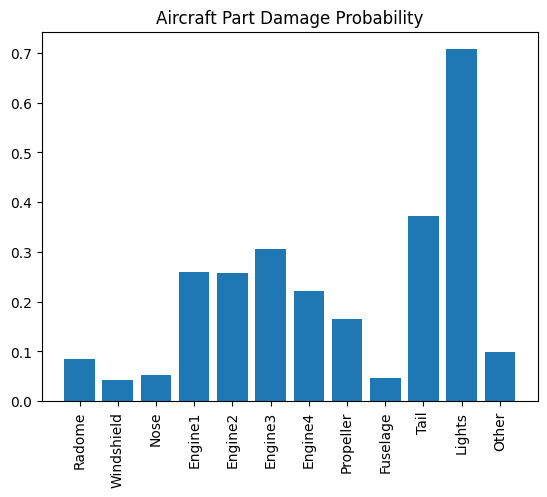

In [7]:
# Calculate the probability of each part of the aircraft
#  getting damaged and find the part with the highest
#  damage probability
plt.bar(strikes.keys(), strikes.values())
plt.xticks(rotation=90)
plt.title("Aircraft Part Damage Probability")
print(max(strikes, key=strikes.get))